In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [11]:
# data load
wine = pd.read_csv('wine.data')
wine.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [12]:
wine.columns

Index(['1', '14.23', '1.71', '2.43', '15.6', '127', '2.8', '3.06', '.28',
       '2.29', '5.64', '1.04', '3.92', '1065'],
      dtype='object')

In [13]:
wine.columns = ['Country','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

In [16]:
wine.dtypes

Country                           int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027092F0DBE0>,
      dtype=object)

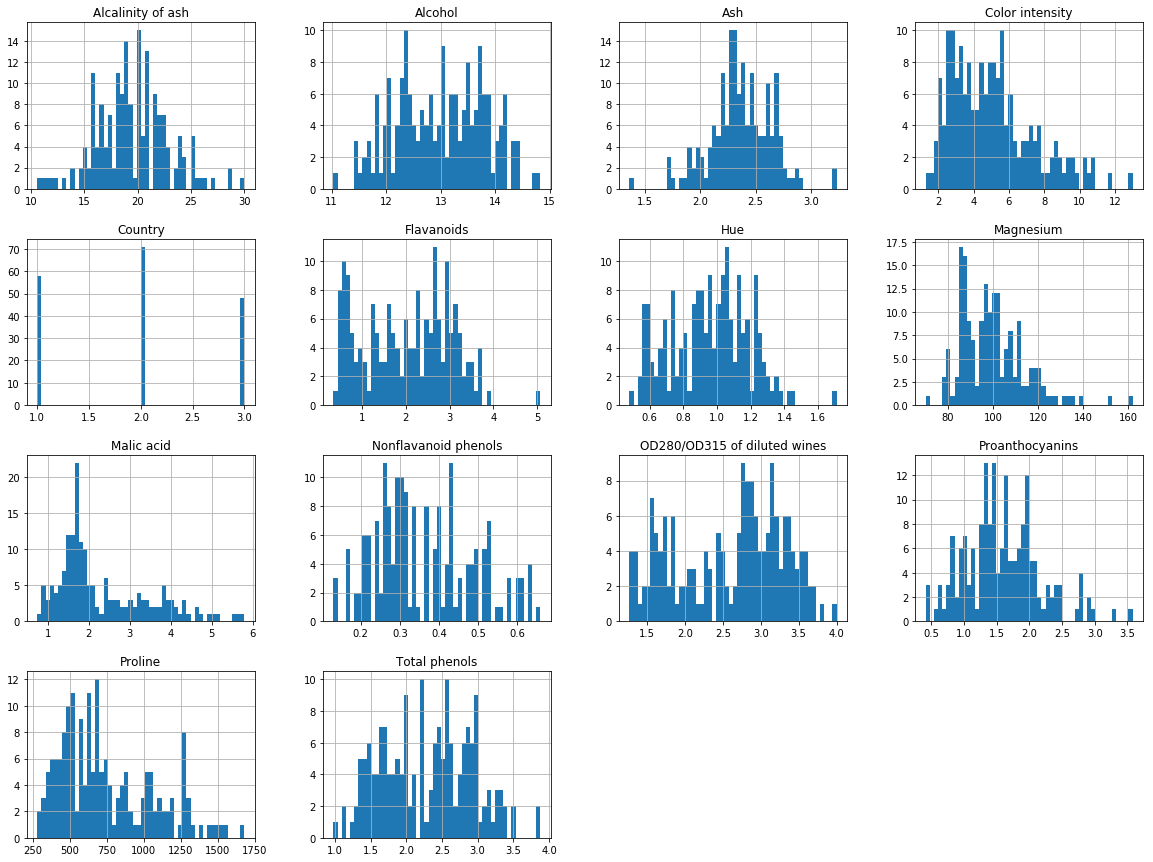

In [18]:
wine.hist(bins=50, figsize=(20,15))

(array([ 1.,  3.,  7., 14., 43., 53., 31., 20.,  3.,  2.]),
 array([1.36 , 1.547, 1.734, 1.921, 2.108, 2.295, 2.482, 2.669, 2.856,
        3.043, 3.23 ]),
 <a list of 10 Patch objects>)

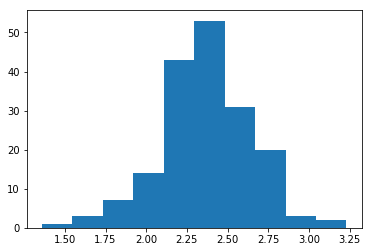

In [40]:
plt.hist(wine['Ash'].values)

In [23]:
wine_Y = wine.iloc[:,0]
wine_X = wine.iloc[:,1:]

In [27]:
#train_set, test_set = train_test_split(, test_size=0.2, random_state=2018)
X_train, X_test, y_train, y_test = train_test_split(
    wine_X, wine_Y, test_size=0.25)

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier().fit(X_train, y_train)
dt.score(X_train, y_train), dt.score(X_test, y_test)

(1.0, 0.9333333333333333)

<BarContainer object of 13 artists>

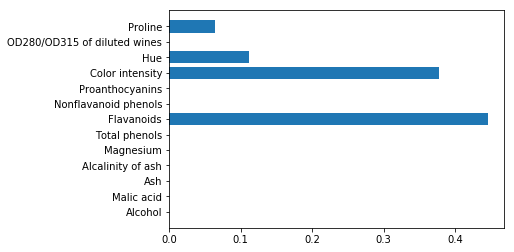

In [31]:
plt.barh(wine_X.columns , dt.feature_importances_)

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
rf.score(X_train, y_train), rf.score(X_test, y_test)

(1.0, 1.0)

<BarContainer object of 13 artists>

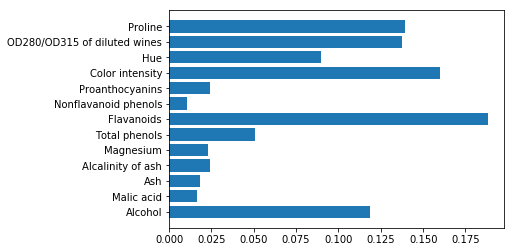

In [33]:
plt.barh(wine_X.columns , rf.feature_importances_)

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
gbc.score(X_train, y_train), gbc.score(X_test, y_test)

(1.0, 0.9111111111111111)

<BarContainer object of 13 artists>

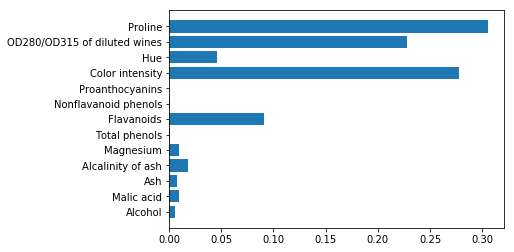

In [36]:
plt.barh(wine_X.columns , gbc.feature_importances_)

In [37]:
from sklearn.ensemble import AdaBoostClassifier
adc = AdaBoostClassifier(random_state=0).fit(X_train, y_train) # 아주 작게 만듬
adc.score(X_train, y_train), adc.score(X_test, y_test)

(1.0, 0.9333333333333333)

<BarContainer object of 13 artists>

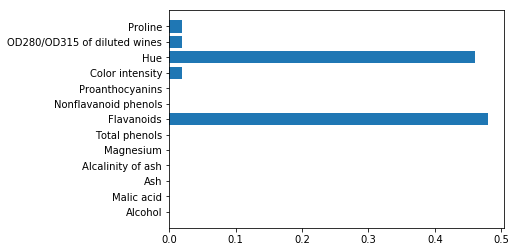

In [38]:
plt.barh(wine_X.columns , adc.feature_importances_)

In [39]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100)).fit(X_train, y_train)
mlp.score(X_train, y_train), mlp.score(X_test, y_test)

(0.5378787878787878, 0.5111111111111111)